# Proyecto 1: Interpolación, Integracion y raíces de Ecuaciones

Nombre: Wanda Rincón Cadena . Código: 2168296. Maestría en Matemática Aplicada UIS.

Función asignada: Libre, elegí *Polinomios de Legendre* 

https://es.wikipedia.org/wiki/Polinomios_asociados_de_Legendre

Los polinomios asociados de Legendre son las soluciones canónicasde la **ecuación de Legendre**.

<center>$(1-x^{2})y'' - 2xy' + (l[l+1]-\frac{m^{2}}{1-x^{2}})y = 0$</center>

O de forma equivalente:

<center>$([1-x^{2}]y')' + (l[l+1]-\frac{m^{2}}{1-x^{2}})y = 0$</center>

**$l: $Grado del polinomio, $m: $ Orden del polinomio**

Esta ecuación tiene soluciones distintas de 0 que son no singulares en **[-1,1]** sólo si ℓ y m son enteros con 0 ≤ m ≤ ℓ. 

> Cuando m es cero y ℓ entero, estas funciones son idénticas a los **polinomios de Legendre. **

En general, cuando ℓ y m son enteros, las soluciones regulares a veces son llamadas "polinomios asociados de Legendre", incluso cuando estas no son polinomios en el caso de que m sea impar. 


## Polinomios ortogonales


Los polinomios ortogonales son conjuntos de polinomios que forman una base ortogonal de cierto espacio de Hilbert. Los polinomios ortogonales son importantes porque aparecen en la teoría de ecuaciones diferenciales, muy especialmente en la teoría de Sturm-Liouville, la teoría de espacios de Hilbert, la teoría de la aproximación de funciones y la mecánica cuántica.

Asumiendo que $0\leq m \leq l$ se satisface  la condición de ortogonalidad para un m fijo:


<center>$\int _{-1}^{1} P_{k}^{m}P_{l}^{m}dx = \frac{2(l+m)!}{(2l+1)(l-m)!}\delta_{k,l}$</center>

Donde $\delta_{k,l}$ es el delta de kronecher.

## Relaciones de recurrencia 

En matemática, una relación de recurrencia es una ecuación que define una secuencia recursiva; cada término de la secuencia es definido como una función de términos anteriores.

Los polinomios de Legendre pueden construirse usando las tres relaciones de recurrencia

$(n+1)P_{n+1} = (2n+1)xP_{n}- nP_{n-1}$

y

$\frac{x^{2}-1}{n} \frac{d}{dx}P_n = xP_n - P_{n-1} $



## Aplicaciones de polinomios de Legendre en Física

Los polinomios de Legendre, igual que los de Hermite y Laguerre, son útiles en ramas de la Física y en el cálculo numérico ya que permiten el cómputo de integrales definidas sin necesidad de usar fórmulas analíticas, tan sólo fijando como intervalo de integración [ -1 ; +1] (con el correspondiente cambio de variable). Esto es especialmente interesante en programas de cómputo que tratan de resolver una integral definida.


$ \frac{\partial u}{\partial t}
   = h^2 \left( \frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2}
      + \frac{\partial^2 u}{\partial z^2} \right)$
      
      
$\frac{du}{dt} and \frac{d^2 u}{dx^2} $

In [7]:
import numpy as np
import random
from sympy import *
import matplotlib.pyplot as plt
from scipy.misc import comb
import scipy.integrate as sci_integrate
%matplotlib inline

# 1) Interpolación
## 1.1 ) Elabórese un programa para calcular su polinomio ortogonal $P_n(x)$ usando las relaciones de recurrencia



In [8]:
def Pn(n):
    x = symbols('x')
    Ps = [0, x]
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        h = n-1    
        p = ( (2.*h +1.)*x*Pn(h)- h*Pn(h-1.))/(h+1.) 
        return p
    
def dfdx_Pn(n):
    """Retorna la derivada del polinomio de lagrange de grado n"""
    x = symbols('x')
    dPn = (x*Pn(n)-Pn(n-1.))*(n/(x**2-1.))
    return dPn

In [9]:
grado = 3
P = simplify(Pn(grado))
print "Pn de grado", grado, ": ",P
#P.subs(x,3)

Pn de grado 3 :  x*(2.5*x**2 - 1.5)


## 1.2) Dentro del intervalo de definición escójase ne = 11 nodos equidistantes xe(i), i:1,..,11 y encuéntrese los valores

In [10]:
f = lambdify(x, P)
xl = np.linspace(-1,1,11)
yl = f(xl)

print "xe: ",xl
print "\nye: ",yl

xe:  [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]

ye:  [-1.   -0.08  0.36  0.44  0.28 -0.   -0.28 -0.44 -0.36  0.08  1.  ]


##  1.3) Elabore 3 programas para calcular los polinomios interpolantes en la base de algoritmos: Lagrange global, segmentaria lineal y parabólica

In [11]:
def lagrange(n,xl,yl):
    """Retorna polinomio interpolador de grado n-1. Tomando como entrada n puntos."""
    polinomio = 0 #POLINOMIO SOLUCION
    polinomios = [] #GUARDO CADA POLINOMIO
    for i in range(n): #sumas
        lagranges = 1.0
        for j in range(n): #producto
            if i != j:
                lagranges = lagranges*(symbols('x')-xl[j])  / (xl[i] - xl[j])
        polinomios.append(lagranges*yl[i])
        polinomio = polinomio +lagranges*yl[i]
        
    return polinomio, polinomios
        

In [12]:
def segm_lineal(n,a,h,punto,pn,noise = None):
    """Guarda los polinomios, devuelve estimacion en x
    n = Numero de puntos en malla
    a = Punto de inicio del intervalo
    h = distancia entre nodos de la malla
    yl = valor de los puntos evaluados en la funcion
    noise= ruido random
    """
    #Encontrar segmento donde esta el punto x que queremos estimar
    k = int((punto-a)/h)+1
    #print "K: ",k
    xk = a + (k-1)*h
    xk_1 = xk+h
    yk = pn(xk)
    yk_1 = pn(xk_1)
    
    if noise is not None:
        yk += np.random.rand()*noise
        yk_1 += np.random.rand()*noise
    
    polinomio = yk +((yk_1 - yk)/(xk_1-xk))*(symbols('x')-xk)
    estimacion = polinomio.evalf(subs={x:punto})
        
    return polinomio, estimacion
            


ej= np.array(range(10))
print ej
a= 0
h = 1.
k = int((1.5-a)/h)+1
print k
xk = a + (k-1)*h
xk_1 = xk+h
print xk
print xk_1

In [13]:
def segm_cuad(n,a,h,punto,pn,noise = None):
    """Guarda los polinomios, devuelve estimacion en x
    n = Numero de puntos en malla
    a = Punto de inicio del intervalo
    h = distancia entre nodos de la malla
    yl = valor de los puntos evaluados en la funcion
    """
    #Encontrar segmento donde esta el punto x
    k = int((punto-a)/h)+1
    #print "K: ",k
    xk = a + (k-1)*h
    xk_1 = xk+h
    xk_2 = xk + 2*h
    yk = pn(xk)
    yk_1 = pn(xk_1)
    yk_2 = pn(xk_2)
    
    if noise is not None:
        yk += np.random.rand()*noise
        yk_1 += np.random.rand()*noise
        yk_2 += np.random.rand()*noise
    x = symbols('x')
    polinomio = yk + (yk_1 - yk)*((x-xk)/h ) + (yk_2-2*yk_1+yk)*(x-xk)*(x-xk_1)/h**2
    estimacion = polinomio.evalf(subs={x:punto})
        
    return polinomio, estimacion
            

## 1.4  Dentro del intervalo de definición escoja n = 200 nodos equidistantes y encuentre los valores del polinomio en estos nodos mediante de 3 funciones intepolantes y compárese los resultados con los valores exactos.

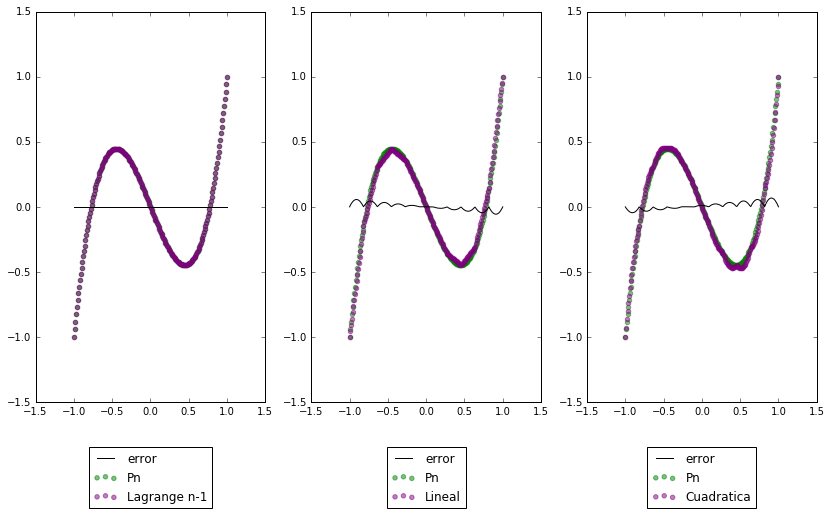

In [14]:
#Lagrange
n = len(xl)
poli_lagrange, __ = lagrange(n,xl,yl) 
f_lagrange = lambdify(x, poli_lagrange) #lambdificada de lagrange

x200 = np.linspace(-1,1,200)
yreal = f(x200)
ylagrange = f_lagrange(x200)

#Segm lineal
a, b = -1., 1.
h = (b - a)/n # n = 11 da mayor error estimando en 200 puntos! Cambiar por un n más pequeño mejora mucho
ylineal = []
for punto in x200:
    polinomio, estimacion = segm_lineal(n,a,h,punto,f)
    #print simplify(polinomio)
    ylineal.append(estimacion)
ylineal = np.array(ylineal)

#Segm cuadr
a, b = -1., 1.
h = (b - a)/n # n = 11 da mayor error estimando en 200 puntos! Cambiar por un n más pequeño mejora mucho
ycuad = []
for punto in x200:
    polinomio, estimacion = segm_cuad(n,a,h,punto,f)
    ycuad.append(estimacion)
ycuad = np.array(ycuad)

####################################################
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.scatter(x200,ylagrange, color = "purple", label= "Lagrange n-1",alpha=.5)
plt.plot(x200,(yreal-ylagrange), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,2)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.scatter(x200,ylineal, color = "purple", label= "Lineal",alpha=.5)
plt.plot(x200,(yreal-ylineal) , color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,3)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.scatter(x200,ycuad, color = "purple", label= "Cuadratica",alpha=.5)
plt.plot(x200,( yreal-ycuad), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

## 1.5) Introduzca los errores aleatorios de 1% en los valores del polinomio yei = yei+0.01* random, y con estos nuevos valores realice la tarea 1.4

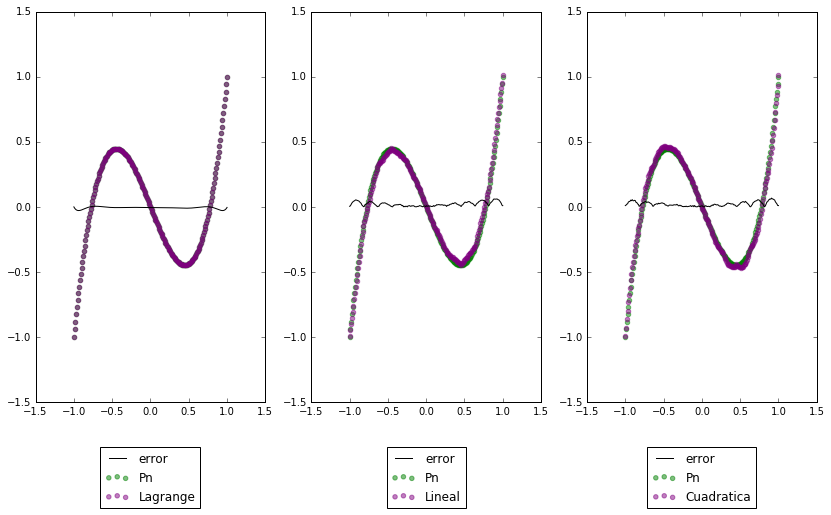

In [15]:
r = np.random.rand(len(xl))
noise = 0.01
error = r*noise
yrand = yl + error

#### Metodo  lagrange

poli_lagrange, __ = lagrange(n,xl,yrand) 
f_lagrange_rand = lambdify(x, poli_lagrange) #lambdificada de lagrange
ylagrange_rand = f_lagrange_rand(x200)
error_lagrange = yreal-ylagrange_rand

### Metodo interpolacion lineal
ylineal_rand = []
for punto in x200:
    polinomio, estimacion = segm_lineal(n,a,h,punto,f,noise)
    ylineal_rand.append(estimacion)
ylineal_rand = np.array(ylineal_rand)
    
error_lineal = np.abs(yreal-ylineal_rand) 

### Metodo interpolacion cuadratica
ycuad_rand = []
for punto in x200:
    polinomio, estimacion = segm_cuad(n,a,h,punto,f,noise)
    ycuad_rand.append(estimacion)
ycuad_rand = np.array(ycuad_rand)
    
error_cuad = np.abs( yreal-ycuad_rand)

#############################################

plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.scatter(x200,ylagrange, color = "purple", label= "Lagrange",alpha=.5)
plt.plot(x200,error_lagrange, color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,2)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.scatter(x200,ylineal_rand, color = "purple", label= "Lineal",alpha=.5)
plt.plot(x200,error_lineal, color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,3)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.scatter(x200,ycuad_rand, color = "purple", label= "Cuadratica",alpha=.5)
plt.plot(x200,error_cuad, color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

## 1.6) Realícese las tareas 1.4 y 1.5 con programas SPLINE-SEVAL
**Nota:** se utiliza un programa profesional en vez de spline seval, la librería numpy de python trae su propio método de <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html">interpolación lineal</a> y scipy uno de <a href= "https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.InterpolatedUnivariateSpline.html#scipy.interpolate.InterpolatedUnivariateSpline">splines.</a>



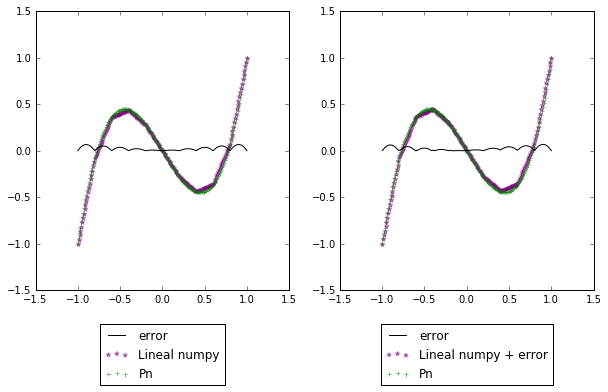

In [16]:
#numpy lineal
yinterp_lineal = np.interp(x200, xl, yl)

#mas ruido
r = np.random.rand(len(xl))
noise = 0.01
error = r*noise
yl_err = yl + error
yinterp_lineal_error = np.interp(x200, xl, yl_err)

plt.figure(figsize=(10,5))
#plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(x200,yinterp_lineal, color = "purple", label= "Lineal numpy",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5,marker="+")
plt.plot(x200,np.abs(yreal-yinterp_lineal), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.scatter(x200,yinterp_lineal_error , color = "purple", label= "Lineal numpy + error",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5, marker="+")
plt.plot(x200,np.abs(yreal-yinterp_lineal_error), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

La interpolacion lineal de la librería numpy da resultados muy similares a los implementados. Adicionalmente se implementó una versión propia de splines interpoladores.

### Bonus Implementación Splines

In [17]:
def splines(xn,f):
    """Interpolacion con splines cúbicos
    
    Entradas:
    
    x = nodos de malla 
    f = funcion Pn 
    
    Salida:
    
    n-1 splines(S_i i = 0..n-2 )  de grado 3 para interpolar 
    
    """
    n = len(xn) #n = Numero de puntos en malla
    print "n nodos: ",n
    yn = f(xn) 
    
    h,b = np.zeros(n-1),np.zeros(n-1)
    
    #Encontrar los coeficientes zi de un  spline cubica
    for i in range(n-1):
        h[i] = xn[i+1]-xn[i]
        b[i] = 6.0*(yn[i+1]-yn[i])/h[i]
    
    u, v= np.zeros(n-1), np.zeros(n-1)
    
    u[1] = 2.0*(h[0]+h[1])
    v[1] = b[1]-b[0]
    
    for i in range(2,n-1):
        u[i] = 2.*(h[i]+h[i-1])- (h[i-1]**2)/u[i-1]
        v[i] = b[i]-b[i-1]-(h[i-1]*v[i-1])/u[i-1]
        
    z = np.zeros(n)    
    #z[n-1] = 0
    
    for i in range(n-2,0,-1):
        #print z[i+1] #Ok: v , h, z
        z[i] = v[i]-(h[i]*z[i+1])/u[i]
        #print z[i]
    
    #Polinomios interpoladores Si
    s = []
    x = symbols('x')
    for i in range(n-1):
        Ai = (z[i+1]-z[i])/(6.*h[i])
        Bi = z[i]/2.
        Ci = -(h[i]*z[i+1])/6. -(h[i]*z[i])/3.+(yn[i+1]-yn[i])/h[i]
        si = yn[i]+(x-xn[i])*(Ci+(x-xn[i])*(Bi+(x-xn[i])*Ai))
        s.append(si)
    return s

n nodos:  11
10


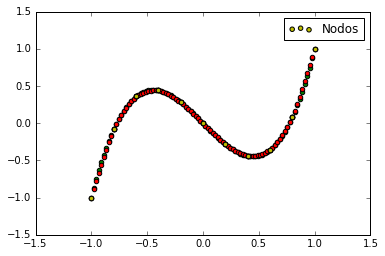

In [18]:
grado = 3
P = simplify(Pn(grado))
f = lambdify(x, P)
s = splines(xl,f)

#print s
print len(s)

from sympy.abc import x

for i in range(len(s)):
    #print i
    puntos = np.linspace(xl[i], xl[i+1],10)
    expr = s[i]
    f_s = lambdify(x, expr)
    y_s = f_s(puntos)
    
    plt.scatter(puntos,f(puntos),c ="green")
    plt.scatter(puntos,y_s,c ="red")

plt.scatter(xl, f(xl),c="y",label="Nodos")
plt.legend()

Se puede ver que el resultado de la interpolación con splines es superior y suave ya que en cada spline $S_i$ y $S_{i+1}$ tienen las mismas derivadas en los extremos que los unen dando una interpolación suave.

### Comparación con Spline Univariado de la librería Scipy

In [19]:
from scipy.interpolate import UnivariateSpline

In [20]:
#scipy splines
spl = UnivariateSpline(xl, yl)
yinterp_splines = spl(x200)

#mas ruido
r = np.random.rand(len(xl))
noise = 0.01
error = r*noise
yl_err = yl + error
spl_err = UnivariateSpline(xl, yl_err)
yinterp_splines_err = spl_err(x200)

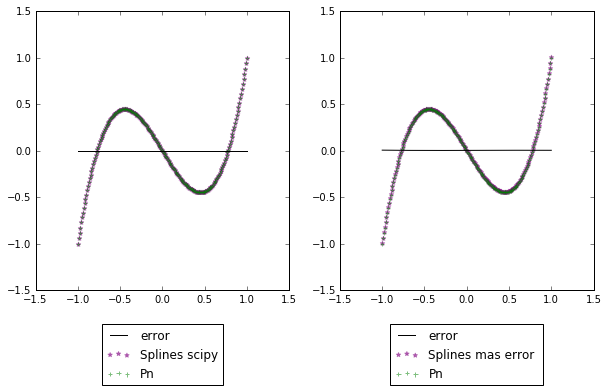

In [21]:
plt.figure(figsize=(10,5))
#plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(x200,yinterp_splines, color = "purple", label= "Splines scipy",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5,marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.scatter(x200,yinterp_splines_err , color = "purple", label= "Splines mas error ",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5, marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines_err), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

## 1.7) Calcular los polinomios intepolantes en base a algoritmos de interpolación segmentaria lineal y parabólica para  las primeras derivadas y realícese las tareas 1.4.



In [22]:
a,b = -0.999, 0.999 #para evitar tener inf y division por 0
dPn = simplify(dfdx_Pn(grado))
df = lambdify(x, dPn)
xl = np.linspace(a,b,11)
yl = df(xl)
print dPn
print xl,"\n",yl

7.5*x**2 - 1.5
[-0.999  -0.7992 -0.5994 -0.3996 -0.1998  0.      0.1998  0.3996  0.5994
  0.7992  0.999 ] 
[ 5.9850075  3.2904048  1.1946027 -0.3023988 -1.2005997 -1.5       -1.2005997
 -0.3023988  1.1946027  3.2904048  5.9850075]


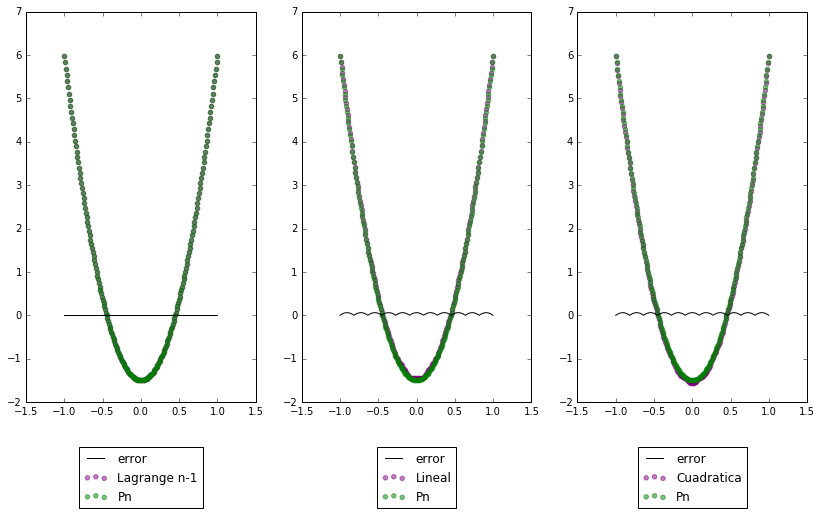

In [23]:
#Lagrange
n = len(xl)
poli_lagrange, __ = lagrange(n,xl,yl) 
f_lagrange = lambdify(x, poli_lagrange) #lambdificada de lagrange

x200 = np.linspace(a,b,200)
yreal = df(x200)
ylagrange = f_lagrange(x200)

#Segm lineal
h = (b - a)/n # n = 11 da mayor error estimando en 200 puntos! Cambiar por un n más pequeño mejora mucho
ylineal = []
for punto in x200:
    polinomio, estimacion = segm_lineal(n,a,h,punto,df)
    ylineal.append(estimacion)
ylineal = np.array(ylineal)

#Segm cuadr
h = (b - a)/n # n = 11 da mayor error estimando en 200 puntos! Cambiar por un n más pequeño mejora mucho
ycuad = []
for punto in x200:
    polinomio, estimacion = segm_cuad(n,a,h,punto,df)
    ycuad.append(estimacion)
ycuad = np.array(ycuad)

####################################################
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(x200,ylagrange, color = "purple", label= "Lagrange n-1",alpha=.5)#plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,np.abs(yreal-ylagrange), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,2)
plt.scatter(x200,ylineal, color = "purple", label= "Lineal",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,np.abs(yreal-ylineal) , color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,3)
plt.scatter(x200,ycuad, color = "purple", label= "Cuadratica",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,np.abs( yreal-ycuad), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

## 1.8) Realícese las tareas 1.4 y 1.5primera y segunda derivada con programas SPLINE-SEVAL

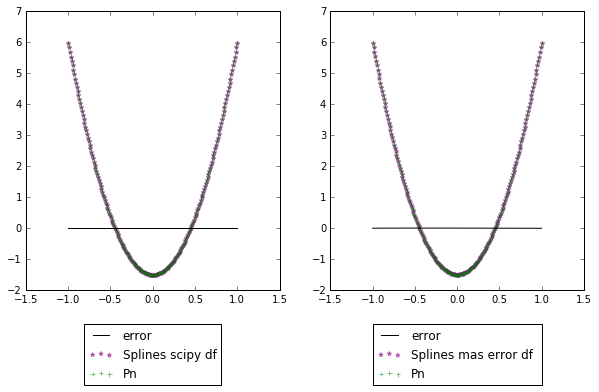

In [24]:
#Primera derivada usando splines

#a,b = -0.999, 0.999 #para evitar tener inf y division por 0
a,b=-1,1
dPn = simplify(dfdx_Pn(grado))
df = lambdify(x, dPn)
xl = np.linspace(a,b,11)
yl = df(xl)
spl = UnivariateSpline(xl, yl)
yinterp_splines = spl(x200)
yreal = df(x200)
#mas ruido
r = np.random.rand(len(xl))
noise = 0.01
error = r*noise
yl_err = yl + error
spl_err = UnivariateSpline(xl, yl_err)
yinterp_splines_err = spl_err(x200)


#graficas

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x200,yinterp_splines, color = "purple", label= "Splines scipy df",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5,marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.scatter(x200,yinterp_splines_err , color = "purple", label= "Splines mas error df ",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5, marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines_err), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

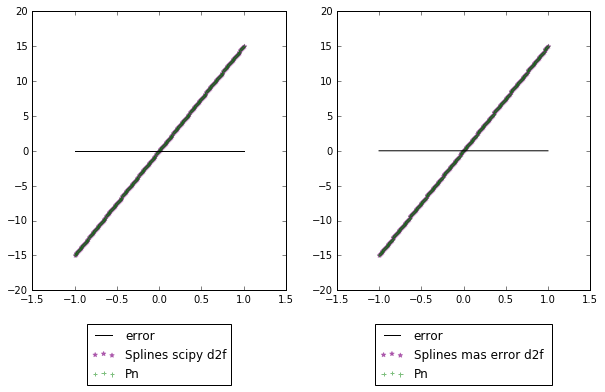

In [25]:
#Segunda derivada usando splines

#a,b = -0.999, 0.999 #para evitar tener inf y division por 0
a,b=-1,1

d2Pn = simplify(dPn.diff(x))
d2f = lambdify(x, d2Pn)
xl2 = np.linspace(a,b,11)
yl2 = d2f(xl)

spl = UnivariateSpline(xl2, yl2)
yinterp_splines = spl(x200)
yreal = d2f(x200)
#mas ruido
r = np.random.rand(len(xl2))
noise = 0.01
error = r*noise
yl2_err = yl2 + error
spl_err = UnivariateSpline(xl2, yl2_err)
yinterp_splines_err = spl_err(x200)


#graficas

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x200,yinterp_splines, color = "purple", label= "Splines scipy d2f",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5,marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.scatter(x200,yinterp_splines_err , color = "purple", label= "Splines mas error d2f ",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5, marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines_err), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

# 2) Integración

 ## 2.1) Dentro del intervalo de definición de su polinomio calcúleselos valores de las integrales usando cuadraturas de trapecios, de Simpson y de Gauss con selección de paso de integración automático en la base del algoritmo de Runge

**Trapecios**


In [26]:
def integral_trapecios(f,a,b,n):
    area = 0 # area bajo la curva
    h = (b-a)/n
    x = [a]
    y = [f(a)]
    for i in range(n): # cada segmento
        xi = a + h*i #x0 y x1
        xi1 = a+ h*(i+1)
        yi,yi1 = f(xi),f(xi1)
        area_trap = (h/2.)*(yi+yi1)
        area += area_trap
        x.append(xi1)
        y.append(yi1)
    return area,x,y

def auto_trap(f, a, b, tol= 1e-3,N_init= 4):
    N = N_init
    i= 0
    I_prev,__,__ = integral_trapecios(f,a,b,N)
    error =10
    while error > tol:
        i+=1
        N = 2*N
        I,__,__= integral_trapecios(f,a,b,N)
        error = np.abs(I-I_prev)#/(2**i -1)
        I_prev = I
        
    return I-error,N

Metodo de trapecios 7 segmentos:  0.0


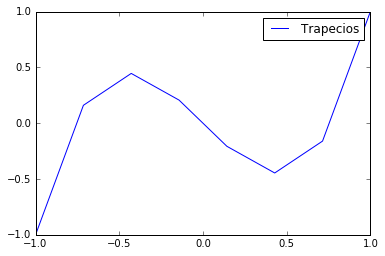

In [27]:
grado = 3
P = simplify(Pn(grado))
f = lambdify(x, P)
lim_a, lim_b = -1.,1.
#plt.plot(np.linspace(lim_a,lim_b,10),f(np.linspace(lim_a,lim_b,10)),c="r",label="Pn")

#Trapecios sin paso automtico
integral, xp, yp = integral_trapecios(f,lim_a,lim_b,7)
plt.plot(xp,yp,c="b",label="Trapecios")
plt.legend()
print "Metodo de trapecios 7 segmentos: ",integral


In [28]:
I, n = auto_trap(f, lim_a, lim_b, tol= 1e-7,N_init= 4)
print "Metodo de trapecios adaptativo: ",I
print "Segmentos N: ",n

Metodo de trapecios adaptativo:  0.0
Segmentos N:  8


**Simpson 1/3**

In [29]:
def integral_simpson(f,a,b,n):
    suma = 0 
    h = (b-a)/n
    for i in range(1,n): # terminos del medio
        #print i
        xi = a + h*(i) #x0 y x1
        if i%2 == 0: 
            suma+=2*f(xi)
        else:
            suma+=4*f(xi)
    suma = (h/3.)*(f(a)+suma+f(b))
    return suma
        
def auto_simp(f, a, b, tol= 1e-3,N_init= 4):
    N = N_init
    i= 0
    I_prev = integral_simpson(f,a,b,N)
    error =10
    while error > tol:
        i+=1
        N = 2*N
        I = integral_simpson(f,a,b,N)
        error = np.abs(I-I_prev)#/(2**i -1)
        I_prev = I
        
    return I-error,N


In [30]:
I, n = auto_simp(f, lim_a, lim_b, tol= 1e-7,N_init= 1)
print "Metodo de simpson adaptativo: ",I
print "N: ",n

Metodo de simpson adaptativo:  0.0
N:  2


**Cuadratura de Gauss-legendre**

In [31]:
def legendre_rodrigues(n):
    "Retorna polinomio de legendre grado n"
    suma = 0
    x = symbols('x')
    polinomio = 0 #POLINOMIO SOLUCION
    for k in range(n+1):
        tmp = (comb(n,k)**2)*((x+1.)**(n-k))*(x-1.)**k
        suma = suma+tmp
    p = (1.0/(2.**n))*suma
    return p

def cuadratura_gauss(a,b,n,f):
    #Obtengo los 0's del polinomio de legendre con formula de rodrigues
    x = Symbol('x')
    zeros = solve(legendre_rodrigues(n),x) #Pn tiene n 0's
    
    #0's son mis xi (nodos) y los puedo elevar a un numero, ahora es un sistema lineal :D
    #Derivada del polinomio
    DPn = diff(legendre_rodrigues(n)) 
    integ = 0
    #Despejo coeficientes Wi
    
    w = []
    
    for xi in zeros:
        wi = 2./((1.-xi**2)*(DPn.evalf(subs={x:xi}))**2)
        w.append(wi)
   
    # Cambio de variables para integrar en (a,b)
    integ = 0
    for k in range(0,n):
        xk = zeros[k]
        integ += w[k]*f((b+a)/2. + (b-a)*(float(xk)/2.))
    
    integ = ((b-a)/2.)*integ
    
    for i in range(n):
        print "W"+str(i)+": ",w[k]," x"+str(i)+" :",zeros[i]
    return integ

def auto_gauss(f, a, b, tol = 1e-4):
    n = 1
    error = 10
    Iprev = 0
    while error> tol:
        I = cuadratura_gauss(a, b, n, f)
        error = np.abs(I-Iprev)
        Iprev = I
        n+=1
    print "n optimo: ", n
        
    return I, n


In [32]:
I,n = auto_gauss(f, lim_a, lim_b )
print "Metodo de cuadratura de Gauss: ",I
print "N: ",n

W0:  2.00000000000000  x0 : 0.0
n optimo:  2
Metodo de cuadratura de Gauss:  0
N:  2


## 2.2) Realícese las tareas 2.1 con programa QUANC8

En vez de usar el algoritmo quanc se usará librería profesional de python:scipy con el fin de comparar algoritmos hechos por el estudiante. Este método usa a su vez la librería en Fortran <a> QUADPACK</a>.

In [33]:
result0 = sci_integrate.quad(f,lim_a, lim_b)
print "Metodo numerico python scipy: ",result0[0]

Metodo numerico python scipy:  0.0


## 2.3 Presente el análisis comparativo de los resultados obtenidos en los puntos 2.1 y 2.2

En este caso los 3 algoritmos presentan buen desempeño y calculan la integral con exactitud, sin embargo en otros ejemplos en mi repositorio se puede observar que de los tres métodos implementados **la cuadratura de gauss es la mejor**. Los métodos de simpson y trapecios necesitan dividir la malla quidistante en muchos segementos para mejorar el cálculo mientras que la cuadratura de gauss usa las raices del polinomio de legendre para hacer una malla no equidistante que da un resultado más exacto.

# 3) Solución de ecuaciones trascendentes

## 3.1)  Elabórese el algoritmo de separación de ceros de su polinomio $P_n$


In [34]:
def separar(a,b,f,h):
    nraices = 0
    xi = a
    xd = xi + h
    yi, yd = f(xi), f(xd)
    intervalos = []
    while xd<b:
        if yi*yd<0:
            nraices +=1
            intervalos.append([xi-h,xd-h,yi,yd])
        xi, yi = xd, yd
        xd, yd = xi+h,f(xd)
    return nraices, intervalos
    

## 3.2) Dentro del intervalo de definición de su polinomio encuéntrese los ceros de los polinomios $P_n(x)$, $P_{n+1}(x)$, $P_{n+2}(x)$ para n = 5 y n = 10 usando los métodos de bisección y de Newton. Asegúrese que las raíces del polinomio $P_n(x)$ se ubican entre las raíces del polinomio $P_{n+1}(x)$ y las raíces del polinomio $P_{n+1}(x)$ se ubican entre las raíces del polinomio  $P_{n+2}(x)$ 



### <center>Bisección</center>

- Fácil de implementar
- Convergencia lenta
- Está garantizado que se encuentran las raices.

In [35]:
def biseccion(a, b, f, tol,maxiter):
    c = (a+b)/2.
    anch = b-a
    if f(a)*f(b)>=0:
        print "a,b: ",a,b
        print "fa,fb: ",f(a), f(b)
        print "La funcion debe tener diferente signo en a y b!"
        return "no evaluable", 0,0
    else:
        i = 0
        while f(c)!= 0 or anch<= tol:
            i+=1 
            if f(a)*f(c)>0:
                #print "muevo izq"
                b = c
            else:
                #print "muevo der"
                a = c
            c = (a+b)/2.
            anch = b - a
            raiz = c
            error = np.abs(b-a)
            if maxiter is not None:
                if i >= maxiter:
                    break
        print "\nRaiz en: ",raiz
        #print "f(x): ",f(raiz)
        #print "numero de iteraciones: ",i
        #print "error: ", error
        return raiz, f(raiz),error
    


**Bisección con n = 5**


*********************************************************************************
Pn de grado 5:  x*(7.875*x**4 - 8.75*x**2 + 1.875)

Numero de raices encontradas fn:  5

Raiz en:  -0.905

Raiz en:  -0.535

Raiz en:  -0.01

Raiz en:  0.53

Raiz en:  0.9

*********************************************************************************
Pn de grado 6   14.4375*x**6 - 19.6875*x**4 + 6.5625*x**2 - 0.3125

Numero de raices encontradas fn1:  6

Raiz en:  -0.94

Raiz en:  -0.67

Raiz en:  -0.235

Raiz en:  0.23

Raiz en:  0.665

Raiz en:  0.935
*********************************************************************************
Pn de grado 7   x*(26.8125*x**6 - 43.3125*x**4 + 19.6875*x**2 - 2.1875)

Numero de raices encontradas fn2:  7

Raiz en:  -0.945

Raiz en:  -0.75

Raiz en:  -0.405

Raiz en:  -0.01

Raiz en:  0.4

Raiz en:  0.745

Raiz en:  0.94


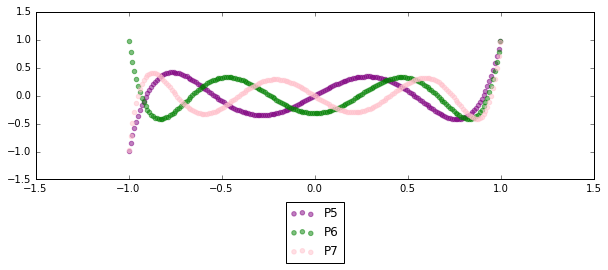

In [36]:
tol = 1e-5
maxiter = 1e3

P = simplify(Pn(5))
print "\n*********************************************************************************"
print "Pn de grado 5: ",simplify(P)
x = symbols('x')
fn = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn,0.01)
print "\nNumero de raices encontradas fn: ", nraices
#print "intervalos donde se encuentran: \n", intervalos

for i in intervalos:
    raiz, fraiz, error = biseccion(i[0] , i[1] , fn, tol,maxiter)
    raices.append(raiz)
    
#################
P = simplify(Pn(6))
print "\n*********************************************************************************"
print "Pn de grado 6  ",simplify(P)
x = symbols('x')
fn1 = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn1,0.01)
print "\nNumero de raices encontradas fn1: ", nraices
#print "intervalos donde se encuentran: \n", intervalos

for i in intervalos:
    raiz, fraiz, error = biseccion(i[0] , i[1] , fn1, tol,maxiter)
    raices.append(raiz)
###########################

P = simplify(Pn(7))
print "*********************************************************************************"
print "Pn de grado 7  ",simplify(P)
x = symbols('x')
fn2 = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn2,0.01)
print "\nNumero de raices encontradas fn2: ", nraices
#print "intervalos donde se encuentran: \n", intervalos

for i in intervalos:
    raiz, fraiz, error = biseccion(i[0] , i[1] , fn2, tol,maxiter)
    raices.append(raiz)

plt.figure(figsize=(10,3))
plt.scatter(x200,fn(x200), color = "purple", label= "P5",alpha=.5)
plt.scatter(x200,fn1(x200), color = "green", label= "P6",alpha=.5)
plt.scatter(x200,fn2(x200), color = "pink", label= "P7",alpha=.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))



**Bisección con n = 10**


*********************************************************************************
Pn de grado 10:  180.42578125*x**10 - 427.32421875*x**8 + 351.9140625*x**6 - 117.3046875*x**4 + 13.53515625*x**2 - 0.24609375

Numero de raices encontradas fn:  10

Raiz en:  -0.98

Raiz en:  -0.865

Raiz en:  -0.675

Raiz en:  -0.44

Raiz en:  -0.145

Raiz en:  0.14

Raiz en:  0.435

Raiz en:  0.67

Raiz en:  0.86

Raiz en:  0.975

*********************************************************************************
Pn de grado 11   x*(344.44921875*x**10 - 902.12890625*x**8 + 854.6484375*x**6 - 351.9140625*x**4 + 58.65234375*x**2 - 2.70703125)

Numero de raices encontradas fn1:  11

Raiz en:  -0.975

Raiz en:  -0.885

Raiz en:  -0.74

Raiz en:  -0.515

Raiz en:  -0.265

Raiz en:  -0.01

Raiz en:  0.26

Raiz en:  0.51

Raiz en:  0.735

Raiz en:  0.88

Raiz en:  0.97
*********************************************************************************
Pn de grado 12   660.1943359375*x**12 - 1894.470703125*x**10 +

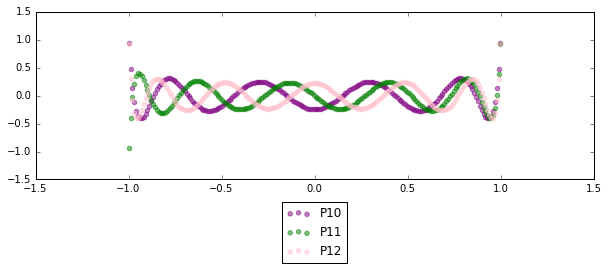

In [37]:
tol = 1e-5
maxiter = 1e3

P = simplify(Pn(10))
print "\n*********************************************************************************"
print "Pn de grado 10: ",simplify(P)
x = symbols('x')
fn = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn,0.01)
print "\nNumero de raices encontradas fn: ", nraices
#print "intervalos donde se encuentran: \n", intervalos

for i in intervalos:
    raiz, fraiz, error = biseccion(i[0] , i[1] , fn, tol,maxiter)
    raices.append(raiz)
    
#################
P = simplify(Pn(11))
print "\n*********************************************************************************"
print "Pn de grado 11  ",simplify(P)
x = symbols('x')
fn1 = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn1,0.01)
print "\nNumero de raices encontradas fn1: ", nraices
#print "intervalos donde se encuentran: \n", intervalos

for i in intervalos:
    raiz, fraiz, error = biseccion(i[0] , i[1] , fn1, tol,maxiter)
    raices.append(raiz)
###########################

P = simplify(Pn(12))
print "*********************************************************************************"
print "Pn de grado 12  ",simplify(P)
x = symbols('x')
fn2 = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn2,0.01)
print "\nNumero de raices encontradas fn2: ", nraices
#print "intervalos donde se encuentran: \n", intervalos

for i in intervalos:
    raiz, fraiz, error = biseccion(i[0] , i[1] , fn2, tol,maxiter)
    raices.append(raiz)


plt.figure(figsize=(10,3))
plt.scatter(x200,fn(x200), color = "purple", label= "P10",alpha=.5)
plt.scatter(x200,fn1(x200), color = "green", label= "P11",alpha=.5)
plt.scatter(x200,fn2(x200), color = "pink", label= "P12",alpha=.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))


### <center>Newton-Raphson</center>

- El orden de convergencia de este método es, por lo menos, cuadrático.
- Mucho más rapido y preciso que bisección

In [41]:
def funcion_analitica(xn,f):
    "Retorna el resultado de estimar en un punto la funcion y su derivada."
    x = Symbol('x')
    df = diff(f)
    return float(f.evalf(subs={x:xn})), float(df.evalf(subs={x:xn})) 

def newton_raphson(a,tol,f):
    """Metodo de newton-raphson para encontrar la raiz de una ecuacion."""
    xn = a
    y,dy = funcion_analitica(xn,f) 
    i = 0
    print xn
    while np.abs(y-0)>tol:
        xn = xn-y/dy
        y,dy = funcion_analitica(xn,f)
        i+=1
    return xn, y

**n = 5 **


*********************************************************************************
Pn de grado 5:  x*(7.875*x**4 - 8.75*x**2 + 1.875)

Numero de raices encontradas fn:  5
-0.91
-0.54
-0.01
0.53
0.9

*********************************************************************************
Pn de grado 6:  14.4375*x**6 - 19.6875*x**4 + 6.5625*x**2 - 0.3125

Numero de raices encontradas fn:  6
-0.94
-0.67
-0.24
0.23
0.66
0.93

*********************************************************************************
Pn de grado 5:  x*(26.8125*x**6 - 43.3125*x**4 + 19.6875*x**2 - 2.1875)

Numero de raices encontradas fn:  7
-0.95
-0.75
-0.41
-0.01
0.4
0.74
0.94


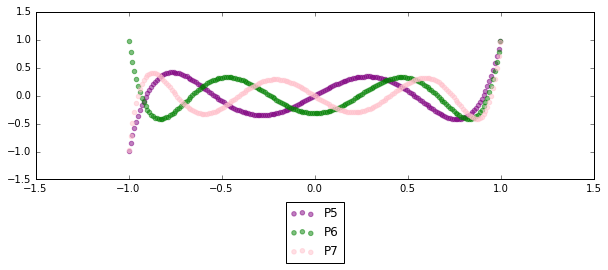

In [45]:
tol = 1e-5
a,b = -1,1
P = simplify(Pn(5))
print "\n*********************************************************************************"
print "Pn de grado 5: ",simplify(P)
x = symbols('x')
fn = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn,0.01)
print "\nNumero de raices encontradas fn: ", nraices


for i in intervalos:
    raiz, fraiz = newton_raphson(i[0], tol , P)
    raices.append(raiz)

######################################################################################################
P = simplify(Pn(6))
print "\n*********************************************************************************"
print "Pn de grado 6: ",simplify(P)
x = symbols('x')
fn1 = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn1,0.01)
print "\nNumero de raices encontradas fn: ", nraices


for i in intervalos:
    raiz, fraiz = newton_raphson(i[0], tol , P)
    raices.append(raiz)

######################################################################################################

P = simplify(Pn(7))
print "\n*********************************************************************************"
print "Pn de grado 5: ",simplify(P)
x = symbols('x')
fn2 = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn2,0.01)
print "\nNumero de raices encontradas fn: ", nraices


for i in intervalos:
    raiz, fraiz = newton_raphson(i[0], tol , P)
    raices.append(raiz)

plt.figure(figsize=(10,3))
plt.scatter(x200,fn(x200), color = "purple", label= "P5",alpha=.5)
plt.scatter(x200,fn1(x200), color = "green", label= "P6",alpha=.5)
plt.scatter(x200,fn2(x200), color = "pink", label= "P7",alpha=.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))


**n = 10 **


*********************************************************************************
Pn de grado 10:  180.42578125*x**10 - 427.32421875*x**8 + 351.9140625*x**6 - 117.3046875*x**4 + 13.53515625*x**2 - 0.24609375

Numero de raices encontradas fn:  10
-0.98
-0.87
-0.68
-0.44
-0.15
0.14
0.43
0.67
0.86
0.97

*********************************************************************************
Pn de grado 11:  x*(344.44921875*x**10 - 902.12890625*x**8 + 854.6484375*x**6 - 351.9140625*x**4 + 58.65234375*x**2 - 2.70703125)

Numero de raices encontradas fn:  11
-0.98
-0.89
-0.74
-0.52
-0.27
-0.01
0.26
0.51
0.73
0.88
0.97

*********************************************************************************
Pn de grado 12:  660.1943359375*x**12 - 1894.470703125*x**10 + 2029.7900390625*x**8 - 997.08984375*x**6 + 219.9462890625*x**4 - 17.595703125*x**2 + 0.2255859375

Numero de raices encontradas fn:  11
-0.99
-0.91
-0.77
-0.59
-0.37
-0.13
0.12
0.36
0.58
0.76
0.9


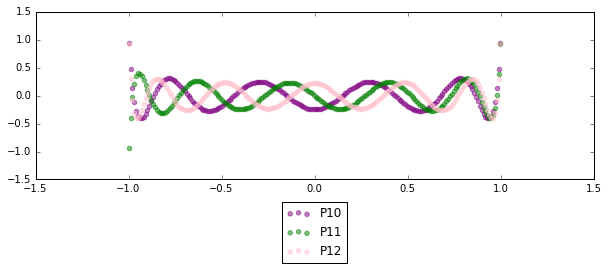

In [47]:
tol = 1e-5
a,b = -1,1
P = simplify(Pn(10))
print "\n*********************************************************************************"
print "Pn de grado 10: ",simplify(P)
x = symbols('x')
fn = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn,0.01)
print "\nNumero de raices encontradas fn: ", nraices


for i in intervalos:
    raiz, fraiz = newton_raphson(i[0], tol , P)
    raices.append(raiz)

######################################################################################################
P = simplify(Pn(11))
print "\n*********************************************************************************"
print "Pn de grado 11: ",simplify(P)
x = symbols('x')
fn1 = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn1,0.01)
print "\nNumero de raices encontradas fn: ", nraices


for i in intervalos:
    raiz, fraiz = newton_raphson(i[0], tol , P)
    raices.append(raiz)

######################################################################################################

P = simplify(Pn(12))
print "\n*********************************************************************************"
print "Pn de grado 12: ",simplify(P)
x = symbols('x')
fn2 = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn2,0.01)
print "\nNumero de raices encontradas fn: ", nraices


for i in intervalos:
    raiz, fraiz = newton_raphson(i[0], tol , P)
    raices.append(raiz)

plt.figure(figsize=(10,3))
plt.scatter(x200,fn(x200), color = "purple", label= "P10",alpha=.5)
plt.scatter(x200,fn1(x200), color = "green", label= "P11",alpha=.5)
plt.scatter(x200,fn2(x200), color = "pink", label= "P12",alpha=.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))


## 1.3 Realícese la tarea 1.2 con programa ZEROIN o FZERO

Alternativamente se usa el método de  <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq">Wijngaarden-Dekker-Brent (1975)</a> presente en la librería scipy.

In [48]:
from scipy.optimize import brenth

In [50]:
tol = 1e-5
maxiter = 1e3

P = simplify(Pn(5))
print "\n*********************************************************************************"
print "Pn de grado 5: ",simplify(P)
x = symbols('x')
fn = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn,0.01)
print "\nNumero de raices encontradas fn: ", nraices
#print "intervalos donde se encuentran: \n", intervalos

for i in intervalos:
    x0 = brenth(fn,i[0],i[1]) 
    raices.append(x0)

print raices


*********************************************************************************
Pn de grado 5:  x*(7.875*x**4 - 8.75*x**2 + 1.875)

Numero de raices encontradas fn:  5
[-0.9061798459386639, -0.5384693101056842, 7.528699885739343e-16, 0.5384693101056842, 0.9061798459386639]


In [51]:
tol = 1e-5
maxiter = 1e3

P = simplify(Pn(6))
print "\n*********************************************************************************"
print "Pn de grado 6: ",simplify(P)
x = symbols('x')
fn = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn,0.01)
print "\nNumero de raices encontradas fn: ", nraices
#print "intervalos donde se encuentran: \n", intervalos

for i in intervalos:
    x0 = brenth(fn,i[0],i[1]) 
    raices.append(x0)

print raices


*********************************************************************************
Pn de grado 6:  14.4375*x**6 - 19.6875*x**4 + 6.5625*x**2 - 0.3125

Numero de raices encontradas fn:  6
[-0.9324695142031518, -0.6612093864662457, -0.23861918608319696, 0.23861918608319696, 0.6612093864662457, 0.9324695142031522]


In [52]:
tol = 1e-5
maxiter = 1e3

P = simplify(Pn(7))
print "\n*********************************************************************************"
print "Pn de grado 7: ",simplify(P)
x = symbols('x')
fn = lambdify(x, P)
raices = []
nraices, intervalos = separar(a,b,fn,0.01)
print "\nNumero de raices encontradas fn: ", nraices
#print "intervalos donde se encuentran: \n", intervalos

for i in intervalos:
    print i[0],i[1]
    x0 = brenth(fn,i[0],i[1]) 
    raices.append(x0)

print raices


*********************************************************************************
Pn de grado 7:  x*(26.8125*x**6 - 43.3125*x**4 + 19.6875*x**2 - 2.1875)

Numero de raices encontradas fn:  7
-0.95 -0.94
-0.75 -0.74
-0.41 -0.4
-0.01 7.52869988574e-16
0.4 0.41
0.74 0.75
0.94 0.95
[-0.9491079123427585, -0.7415311855992367, -0.4058451513774093, 7.528699885739343e-16, 0.4058451513774093, 0.7415311855992373, 0.9491079123427583]


**Análisis**

Los métodos para encontrar raíces implementados necesitan de grandes tiempos de convergencia, sin embargo la precición obtenida es bastante aceptable si los comparamos con los resultados profesionales.